In [ ]:
"""https://jawadtitanic.streamlit.app"""

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train_data.csv
/kaggle/input/titanic/test_data.csv


In [2]:
import sklearn
!pip install scikit-learn==1.3.2
print("scikit-learn version:", sklearn.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 80.9 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.3.2 which is incompatible.
scikit-learn version: 1.2.2


In [3]:
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)


3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
1.2.2


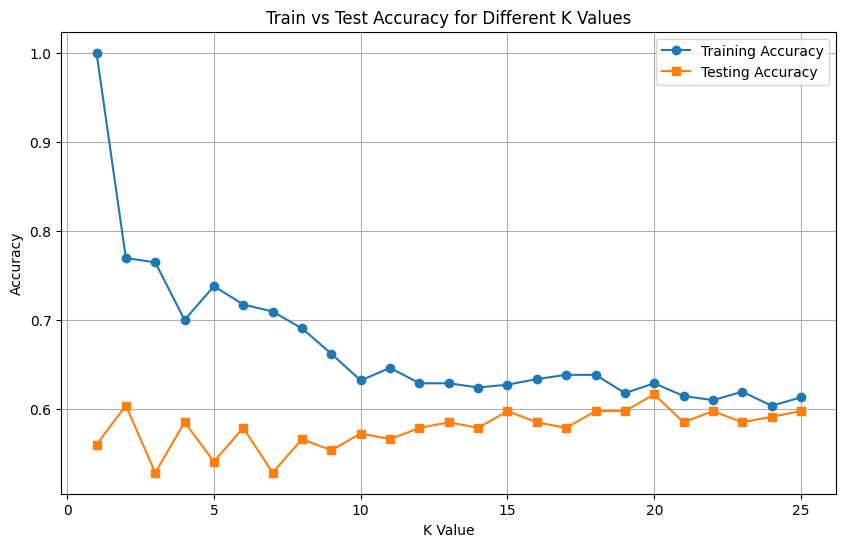


BEST K FOUND = 20

--------------------------------
Final Model (K = 20) Metrics:
Training Accuracy: 0.629
Test Accuracy:     0.616
--------------------------------
Precision: 0.500
Recall:    0.131
F1 Score:  0.208


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# -----------------------------------------------------
# 1) Custom Euclidean Distance Function
# -----------------------------------------------------
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


# -----------------------------------------------------
# 2) Custom KNN Classifier (NO sklearn)
# -----------------------------------------------------
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X.values
        self.y_train = y.values

    def predict_one(self, x):
        distances = []
        for i in range(len(self.X_train)):
            dist = euclidean_distance(self.X_train[i], x)
            distances.append((dist, self.y_train[i]))

        distances.sort(key=lambda x: x[0])
        k_neighbors = distances[:self.k]

        labels = [label for _, label in k_neighbors]
        prediction = max(set(labels), key=labels.count)
        return prediction

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            predictions.append(self.predict_one(X.iloc[i].values))
        return np.array(predictions)


# -----------------------------------------------------
# 3) Load Dataset
# -----------------------------------------------------
df = pd.read_csv("/kaggle/input/titanic/train_data.csv")

df = df.drop(columns=["PassengerId", "Sex"])   # Drop unused

X = df.drop(columns=["Survived"])
y = df["Survived"]

# -----------------------------------------------------
# 4) Train/Test Split
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# -----------------------------------------------------
# 5) Try K values and calculate accuracies
# -----------------------------------------------------
k_values = list(range(1, 26))   # Try k = 1 to 25
train_acc_list = []
test_acc_list = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_acc_list.append(accuracy_score(y_train, y_train_pred))
    test_acc_list.append(accuracy_score(y_test, y_test_pred))

# -----------------------------------------------------
# 6) Plot Train/Test Accuracy vs K
# -----------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(k_values, test_acc_list, marker='s', label='Testing Accuracy')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy for Different K Values")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------------------------
# 7) Best K selection (highest test acc)
# -----------------------------------------------------
best_k = k_values[np.argmax(test_acc_list)]
print(f"\nBEST K FOUND = {best_k}")

# -----------------------------------------------------
# 8) Train Final Model With Best K
# -----------------------------------------------------
mod = KNN(k=best_k)
mod.fit(X_train, y_train)

y_pred_train = mod.predict(X_train)
y_pred_test = mod.predict(X_test)

# -----------------------------------------------------
# 9) Metrics
# -----------------------------------------------------
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("\n--------------------------------")
print(f"Final Model (K = {best_k}) Metrics:")
print(f"Training Accuracy: {train_acc:.3f}")
print(f"Test Accuracy:     {test_acc:.3f}")
print("--------------------------------")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")



In [3]:
import pandas as pd
import numpy as np
import joblib

# -----------------------------------------------------
# 1) Euclidean Distance Function
# -----------------------------------------------------
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


# -----------------------------------------------------
# 2) Custom KNN Classifier (NO sklearn)
# -----------------------------------------------------
class CustomKNN:
    def __init__(self, k=20):        # <-- FIXED K = 20
        self.k = k

    def fit(self, X, y):
        self.X_train = X.values
        self.y_train = y.values

    def predict_one(self, x):
        distances = []
        for i in range(len(self.X_train)):
            dist = euclidean_distance(self.X_train[i], x)
            distances.append((dist, self.y_train[i]))

        distances.sort(key=lambda x: x[0])
        k_neighbors = distances[:self.k]

        labels = [label for _, label in k_neighbors]
        prediction = max(set(labels), key=labels.count)
        return prediction

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            predictions.append(self.predict_one(X.iloc[i].values))
        return np.array(predictions)


# -----------------------------------------------------
# 3) Load & Prepare Dataset
# -----------------------------------------------------
df = pd.read_csv("/kaggle/input/titanic/train_data.csv")

# SAME COLUMNS YOU USED IN TRAINING
df = df.drop(columns=["PassengerId", "Sex"])

X = df.drop(columns=["Survived"])
y = df["Survived"]

# -----------------------------------------------------
# 4) Train Model With K = 20
# -----------------------------------------------------
model = CustomKNN(k=20)
model.fit(X, y)

print("Model trained successfully with K = 20")

# -----------------------------------------------------
# 5) Save Model
# -----------------------------------------------------
joblib.dump(model, "custom_knn_k20.pkl")

print("\nModel saved as custom_knn_k20.pkl")


Model trained successfully with K = 20

Model saved as custom_knn_k20.pkl
